# Here I am using Llama 2 Chat Model with 7 Billion Parameters not a quantized model.

#**LangChain**

LangChain is a framework for developing applications powered by language models.

- GitHub: https://github.com/hwchase17/langchain
- Docs: https://python.langchain.com/en/latest/index.html




#**01: Install All the Required Packages**

https://github.com/facebookresearch/llama

# Tesla T4 GPU

In [1]:
!nvidia-smi

Thu May  9 08:51:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

We need to install transformer because this model is available in hugging face so I'll using hugging face pipeline to load that model that's why i need transformer.We also need to install these dependencies "einops accelerate langchain bitsandbytes" for transformer.

In [2]:
!pip install -q transformers einops accelerate langchain bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 870.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.8/120.8 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 1.7 MB/s eta 0:00:00


#**02: Logged in with a Hugging Face account**

https://huggingface.co/docs/huggingface_hub/quick-start

In [3]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credent

#**03: Import All the Required Libraries**

In [4]:
from langchain.llms import HuggingFacePipeline

AutoTokenizer. A tokenizer is responsible for preprocessing text into an array of numbers as inputs to a model.

In [5]:
from transformers import AutoTokenizer

In [6]:
import transformers

In [7]:
import torch

In [8]:
import warnings
warnings.filterwarnings('ignore')

##**04: Load the Llama 2 Model**

Here,We are using Llama 2 Chat Model with 7 Billion Parameters not a quantized model.

The basic building block of LangChain is a Large Language Model which takes text as input and generates more text

Suppose we want to generate a company name based on the company description. In this case, since we want the output to be more random, we will intialize our model with high temprature.

The temperature parameter adjusts the randomness of the output. Higher values like 0.7 will make the output more random, while lower values like 0.2 will make it more focused and deterministic.

temperature value--> how creative we want our model to be

0 ---> temperature it means model is  very safe it is not taking any bets.

1 --> it will take risk it might generate wrong output but it is very creative

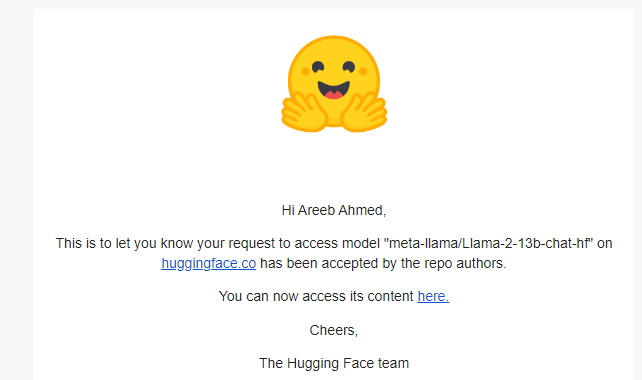In a lot of cases, you must be logged in with a Hugging Face account to interact with the Hub: download private repos, upload files, create PRs,…

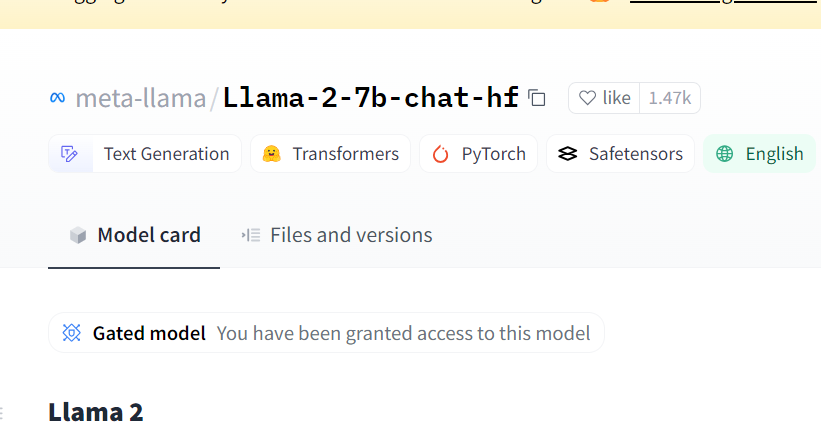

In [15]:
model="meta-llama/Llama-2-7b-chat-hf" #I have already has a permission to acess this model so I am using this one
# model="daryl149/llama-2-7b-chat-hf" (If you are not getting access model then you can use this one and comment above one)

In [16]:
tokenizer=AutoTokenizer.from_pretrained(model)

### Issue: https://github.com/facebookresearch/llama/issues/374

In pipeline,we are giving text input text to pipeline and it will give responese.Basically,in pipeline we apply preprocessing with help of autotokinizer then  autotokinizer covert text into number then vector passed to the model then prediction would be happen and it will give response.Below is the autopipeline so we don't need to take care of this task automatically it would be done.

In [17]:
pipeline=transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    max_length=1000,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id
    )

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [18]:
llm=HuggingFacePipeline(pipeline=pipeline, model_kwargs={'temperature':0})

In [19]:
prompt="What would be a good name for a company that makes colorful socks"

In [20]:
print(llm(prompt))

What would be a good name for a company that makes colorful socks?

Answer: Here are some suggestions for a company name that makes colorful socks:

1. SoleMates: This name plays on the idea of socks being a companion for your feet, and the word "mates" implies a sense of friendship and fun.
2. Hue & Cry: This name references the idea of colorful socks making a statement and causing a reaction, while also being a clever play on words.
3. Footloose & Fancy-Free: This name conveys a sense of freedom and fun, which could be appealing to customers looking for colorful socks to add some excitement to their outfits.
4. The Sock Syndicate: This name has a fun, playful tone, and the word "syndicate" implies a sense of collaboration and creativity.
5. Sock It to Me: This name is a clever play on words that references the idea of socks being a fun and fashionable accessory.
6. The Sock Society: This name has a sophisticated, high-end feel, and the word "society" implies a sense of exclusivity an

In [23]:
prompt="I want to open a restaurant for  pakistani food. Suggest me a fence name for this"

In [24]:
print(llm(prompt))

I want to open a restaurant for  pakistani food. Suggest me a fence name for this restaurant.

Answer:

Congratulations on your decision to open a Pakistani restaurant! Choosing a unique and memorable name for your restaurant is crucial to make it stand out and attract customers. Here are some suggestions for your Pakistani restaurant:

1. Spice Route: This name suggests a journey through the flavors of Pakistan, which is fitting given the diverse and rich culinary heritage of the country.
2. Tandoor Nights: Tandoors are clay ovens used in Pakistani cuisine to cook a variety of dishes, including naan bread, kebabs, and roti. This name evokes the warm and inviting atmosphere of a Pakistani dinner party.
3. Lahori Kebab House: Lahore is known for its delicious kebabs, so this name would be perfect for a restaurant that specializes in these tasty treats.
4. Karachi Kitchen: Karachi is the largest city in Pakistan and is known for its vibrant food scene. This name would be great for a rest

##**05: Prompt Templates**

Currently in the above applications we are writing an entire prompt, if you are creating a user directed application then this is not an ideal case

LangChain faciliates prompt management and optimization.

Normally when you use an LLM in an application, you are not sending user input directly to the LLM. Instead, you need to take the user input and construct a prompt, and only then send that to the LLM.

In many Large Language Model applications we donot pass the user input directly to the Large Language Model, we add the user input to a large piece of text called prompt template

#Import All the Required Libraries

In [25]:
from langchain.prompts import PromptTemplate

In [26]:
from langchain.chains import LLMChain

#**Example 1**

In [27]:
prompt_template1=PromptTemplate(input_variables=["cuisine"],
                               template="I want to open a restaurant for {cuisine} food. Suggest a fency name for this")

In [28]:
input_prompt=prompt_template1.format(cuisine="pakistani")

In [29]:
print(input_prompt)

I want to open a restaurant for pakistani food. Suggest a fency name for this


#**Example 2**

In [30]:
prompt_template2=PromptTemplate(input_variables=["book_name"],
                               template="Provide me a concise summary of the book {book_name}")

In [31]:
input_prompt=prompt_template2.format(book_name="Alchemist")

In [32]:
print(input_prompt)

Provide me a concise summary of the book Alchemist


In [34]:
chain = LLMChain(llm=llm, prompt=prompt_template1, verbose=True)
response= chain.run("Pakistani")
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
I want to open a restaurant for Pakistani food. Suggest a fency name for this

> Finished chain.
I want to open a restaurant for Pakistani food. Suggest a fency name for this restaurant.
Restaurant Name Suggestions for Pakistani Food:
1. Tandoori Nights: This name suggests a warm and cozy atmosphere, perfect for enjoying Pakistani dishes made in a tandoor oven.
2. Spice Route: This name evokes the idea of a journey through the diverse spices and flavors of Pakistani cuisine.
3. Karachi Kitchen: This name highlights the city of Karachi as a hub of Pakistani culinary excellence.
4. Desi Delights: "Desi" means "local" or "regional" in Hindi and Urdu, making this name a fitting tribute to Pakistani cuisine.
5. Mughal Morsels: The Mughal Empire was known for its rich culinary traditions, so this name suggests a restaurant that serves up delicious and authentic Pakistani dishes.
6. Lahori Lane: This name references the city of Lahor

In [35]:
chain = LLMChain(llm=llm, prompt=prompt_template2, verbose=True)
response= chain.run("Harry Potter")
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
Provide me a concise summary of the book Harry Potter

> Finished chain.
Provide me a concise summary of the book Harry Potter and the Philosopher's Stone by J.K. Rowling.  Sure, here is a brief summary of Harry Potter and the Philosopher's Stone by J.K. Rowling:

Harry Potter is an orphan who lives with his cruel and neglectful relatives, the Dursleys. On his eleventh birthday, he discovers that he is a wizard and begins attending Hogwarts School of Witchcraft and Wizardry. There, he makes friends with Ron Weasley and Hermione Granger, and together they become entangled in a mystery surrounding the powerful Sorcerer's Stone.

The trio must stop the evil wizard, Lord Voldemort, who is attempting to return to power and destroy Harry. Along the way, they encounter various obstacles, including obstacles, including difficult classes, magical creatures, and dark secrets from Hogwarts' past.

Throughout the book, Rowling creates a r